In [1]:
%matplotlib inline

import sys
import random
import matplotlib.pylab as plt
import numpy as np

In [2]:
nx = 10E22 # number of soft photons, background photons
ny = 10000 # number of gamma ray photons
E = 1./511. # energy of soft photons, dimensionless
Ey = 2045 # energy of high-energy photons, values not bigger than 2044 in mc^2 give nan for sigma
mu = 0.5 # angle between soft, high-energy photon
w = np.sqrt(E*Ey*(1-mu)/2.)
sigma = np.pi*7.9408E-26/(w**6)*((2*w**4+2*w*w-1)*np.log(w+np.sqrt(w*w-1))-w*(w*w+1)*np.sqrt(w*w-1)) # cross section
Sigma = nx*sigma # total cross section
rng = np.random.RandomState() # seed of the random number generator
l = np.zeros(ny)
for i in range(ny):
    tau = rng.uniform(0,1,size=1) # uniform distribution
    l[i] = -1./Sigma*np.log(tau) # transformation of the random variable

mfp: 1796.434832


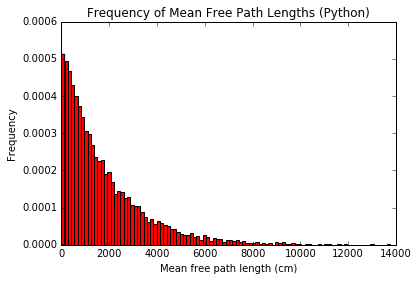

In [3]:
n, bins, patches = plt.hist(l,100,normed=True,facecolor='r',alpha=1.0)
print "mfp: %f" % l.mean()
plt.xlabel("Mean free path length (cm)")
plt.ylabel("Frequency")
plt.title("Frequency of Mean Free Path Lengths (Python)")

# C++ Graphics

609.290806179
601.283426369
423.95


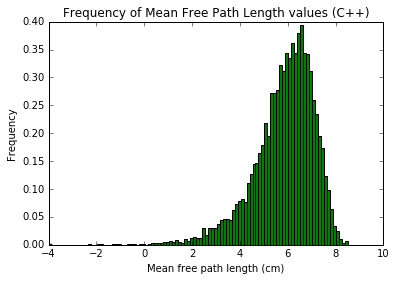

In [4]:
my_file = open('meanfreepathlength.txt','r') # read in the file, using a more memory efficient code
lArray2 = my_file.read().split('\n') # split the elements up using a delimiter
my_file.close()
lArray2.remove('') # delete the extra element created by the final newline
lArrayfloat2 = np.zeros(len(lArray2))
for i in range(len(lArrayfloat2)):
    lArrayfloat2[i] = float(lArray2[i]) # turn the list of strings into a list of floats
print np.mean(lArrayfloat2)
print np.std(lArrayfloat2)
print np.median(lArrayfloat2)
n, bins, patches = plt.hist(np.log(lArrayfloat2),100,normed=True,facecolor='g',alpha=1.0) # the histogram
plt.xlabel("Mean free path length (cm)")
plt.ylabel("Frequency")
plt.title("Frequency of Mean Free Path Length values (C++)")